<a href="https://www.kaggle.com/code/mostafahabibi1994/mobile-price-prediction-classification?scriptVersionId=154896723" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')


In [2]:
data = pd.read_csv('/kaggle/input/mobile-price/train.csv')
data_test = pd.read_csv('/kaggle/input/mobile-price/test.csv')
df = pd.DataFrame(data)
df_test = pd.DataFrame(data_test)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df_test = df_test.drop(columns = 'id')
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [4]:
list(df.columns)

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.describe().T.style.background_gradient(cmap = 'viridis')

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.000000,1238.518500,439.418206,501.000000,851.750000,1226.000000,1615.250000,1998.000000
blue,2000.000000,0.495000,0.500100,0.000000,0.000000,0.000000,1.000000,1.000000
clock_speed,2000.000000,1.522250,0.816004,0.500000,0.700000,1.500000,2.200000,3.000000
dual_sim,2000.000000,0.509500,0.500035,0.000000,0.000000,1.000000,1.000000,1.000000
fc,2000.000000,4.309500,4.341444,0.000000,1.000000,3.000000,7.000000,19.000000
four_g,2000.000000,0.521500,0.499662,0.000000,0.000000,1.000000,1.000000,1.000000
int_memory,2000.000000,32.046500,18.145715,2.000000,16.000000,32.000000,48.000000,64.000000
m_dep,2000.000000,0.501750,0.288416,0.100000,0.200000,0.500000,0.800000,1.000000
mobile_wt,2000.000000,140.249000,35.399655,80.000000,109.000000,141.000000,170.000000,200.000000
n_cores,2000.000000,4.520500,2.287837,1.000000,3.000000,4.000000,7.000000,8.000000


**There Are some odd values in the dataset**
* > Zero values for px_height
* > Zero values for sc_w


In [7]:
df[df['px_height'] == 0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,0,994,1958,7,5,7,1,1,0,1


**I am writing a code to check if the values for px_height and px_width are logical or NOT ↓↓↓↓**

In [8]:
import math

def calculate_aspect_ratio(row):
    height = int(row['px_height'])
    width = int(row['px_width'])
    gcd = math.gcd(height , width)
    simple_height = height // gcd
    simple_width = width // gcd
    return simple_height , simple_width

def check_ratio(row , threshold = 0.1):
    aspect_ratio = calculate_aspect_ratio(row)
    
    lower = 1 - threshold
    upper = 1 + threshold
    
    if lower <= aspect_ratio[0] / aspect_ratio[1] <= upper :
        return True
    else :
        return False
    
df['aspect_ratio'] = df.apply(check_ratio , axis = 1)

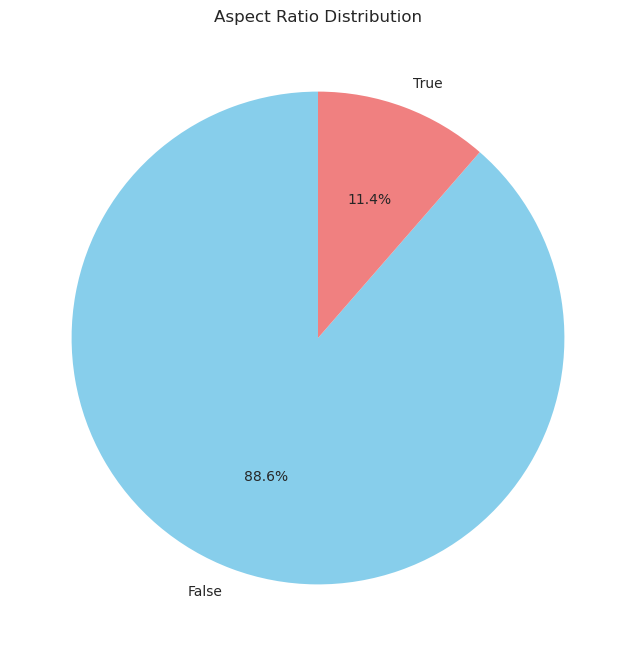

In [9]:
plt.figure(figsize=(10,8))
counts = df['aspect_ratio'].value_counts()
plt.pie(counts, labels =  counts.index , autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Aspect Ratio Distribution')
plt.show()

**As you can se most values for PX features are not logical but I do not have access to data owner sp I keep them anyway and drop zero values only**

In [10]:
df = df.drop(columns = 'aspect_ratio')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [11]:
df = df.drop([1481,1933] )
df = df.reset_index(drop= True)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1994,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1995,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1996,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [12]:
df[df['sc_w'] == 0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33,0.6,159,4,...,607,748,1482,18,0,2,1,0,0,1
24,503,0,1.2,1,5,1,8,0.4,111,3,...,201,1245,2583,11,0,12,1,0,0,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,...,178,1919,3845,7,0,12,1,1,0,3
42,1253,1,0.5,1,5,1,5,0.2,152,2,...,685,714,1878,15,0,4,1,1,0,1
50,1547,1,3.0,1,2,1,14,0.7,198,3,...,1042,1832,2059,5,0,15,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,772,0,1.0,1,0,1,23,0.6,97,7,...,317,1805,2782,7,0,17,1,0,0,2
1919,591,1,0.5,1,1,1,16,0.9,90,6,...,892,1603,3746,5,0,5,1,1,0,3
1944,590,1,1.2,1,0,0,32,0.4,141,6,...,227,509,1817,10,0,6,0,1,0,0
1952,686,1,2.7,1,0,0,36,0.1,194,4,...,64,745,1503,10,0,13,0,0,0,0


**SC_W feature has too many zero values so i am going to drop them**

In [13]:
df = df.drop(df[df['sc_w'] == 0].index)
df = df.reset_index(drop= True)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1815,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1816,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1817,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# Analyzing The Data

In [14]:
categoricals = []
numericals = []
for col in df.drop(columns = ['price_range','n_cores']).columns:
    if df[col].nunique() < 4:
        categoricals.append(col)
    else:
        numericals.append(col)
        
print('Categoricals : ' , categoricals)
print('Numericals : ' , numericals)

Categoricals :  ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
Numericals :  ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


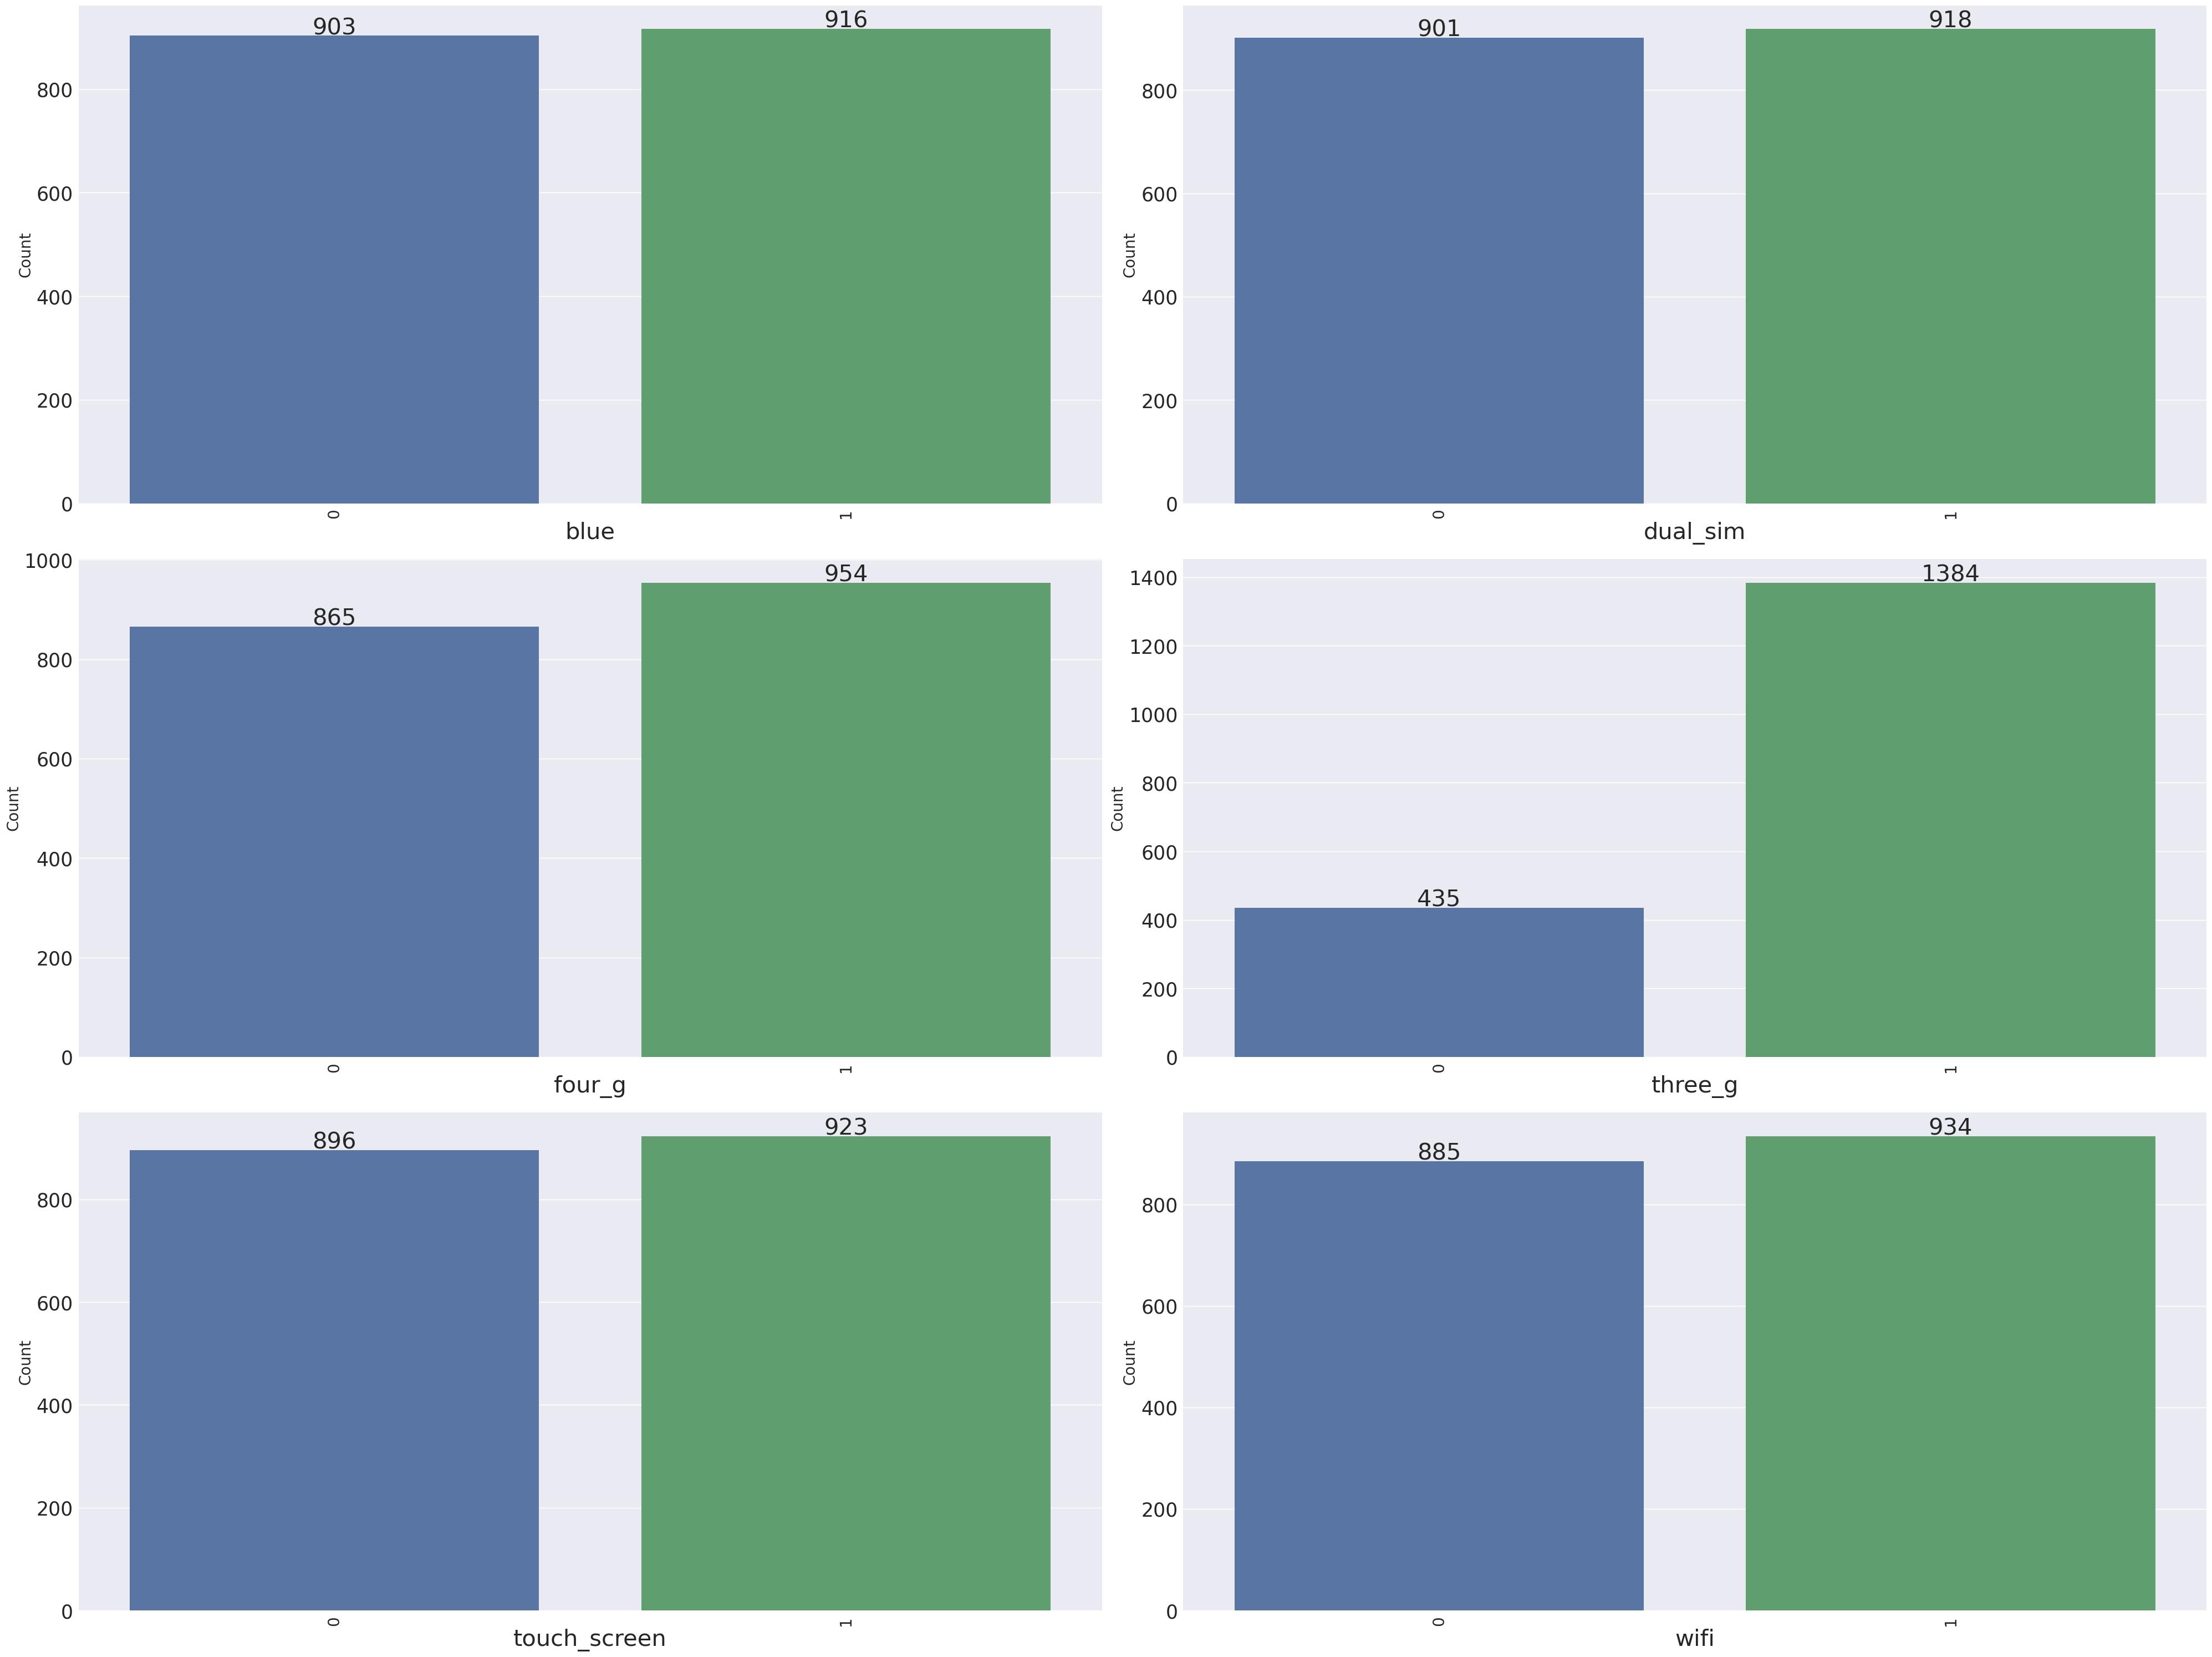

In [15]:
fig,axs = plt.subplots(nrows = 3,ncols = 2,figsize = (40,30))
axs = axs.flatten()
for i,var in enumerate(categoricals) :
    sns.countplot(x = var , data = df,ax = axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation = 90,fontsize = 20)   
    axs[i].set_xlabel(var ,fontsize=30) 
    axs[i].set_ylabel('Count',fontsize = 20)
    axs[i].tick_params(axis='y', labelsize=25)
    
    for p in axs[i].patches:
                axs[i].annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',
                fontsize=30)
    



fig.tight_layout()     
plt.show()

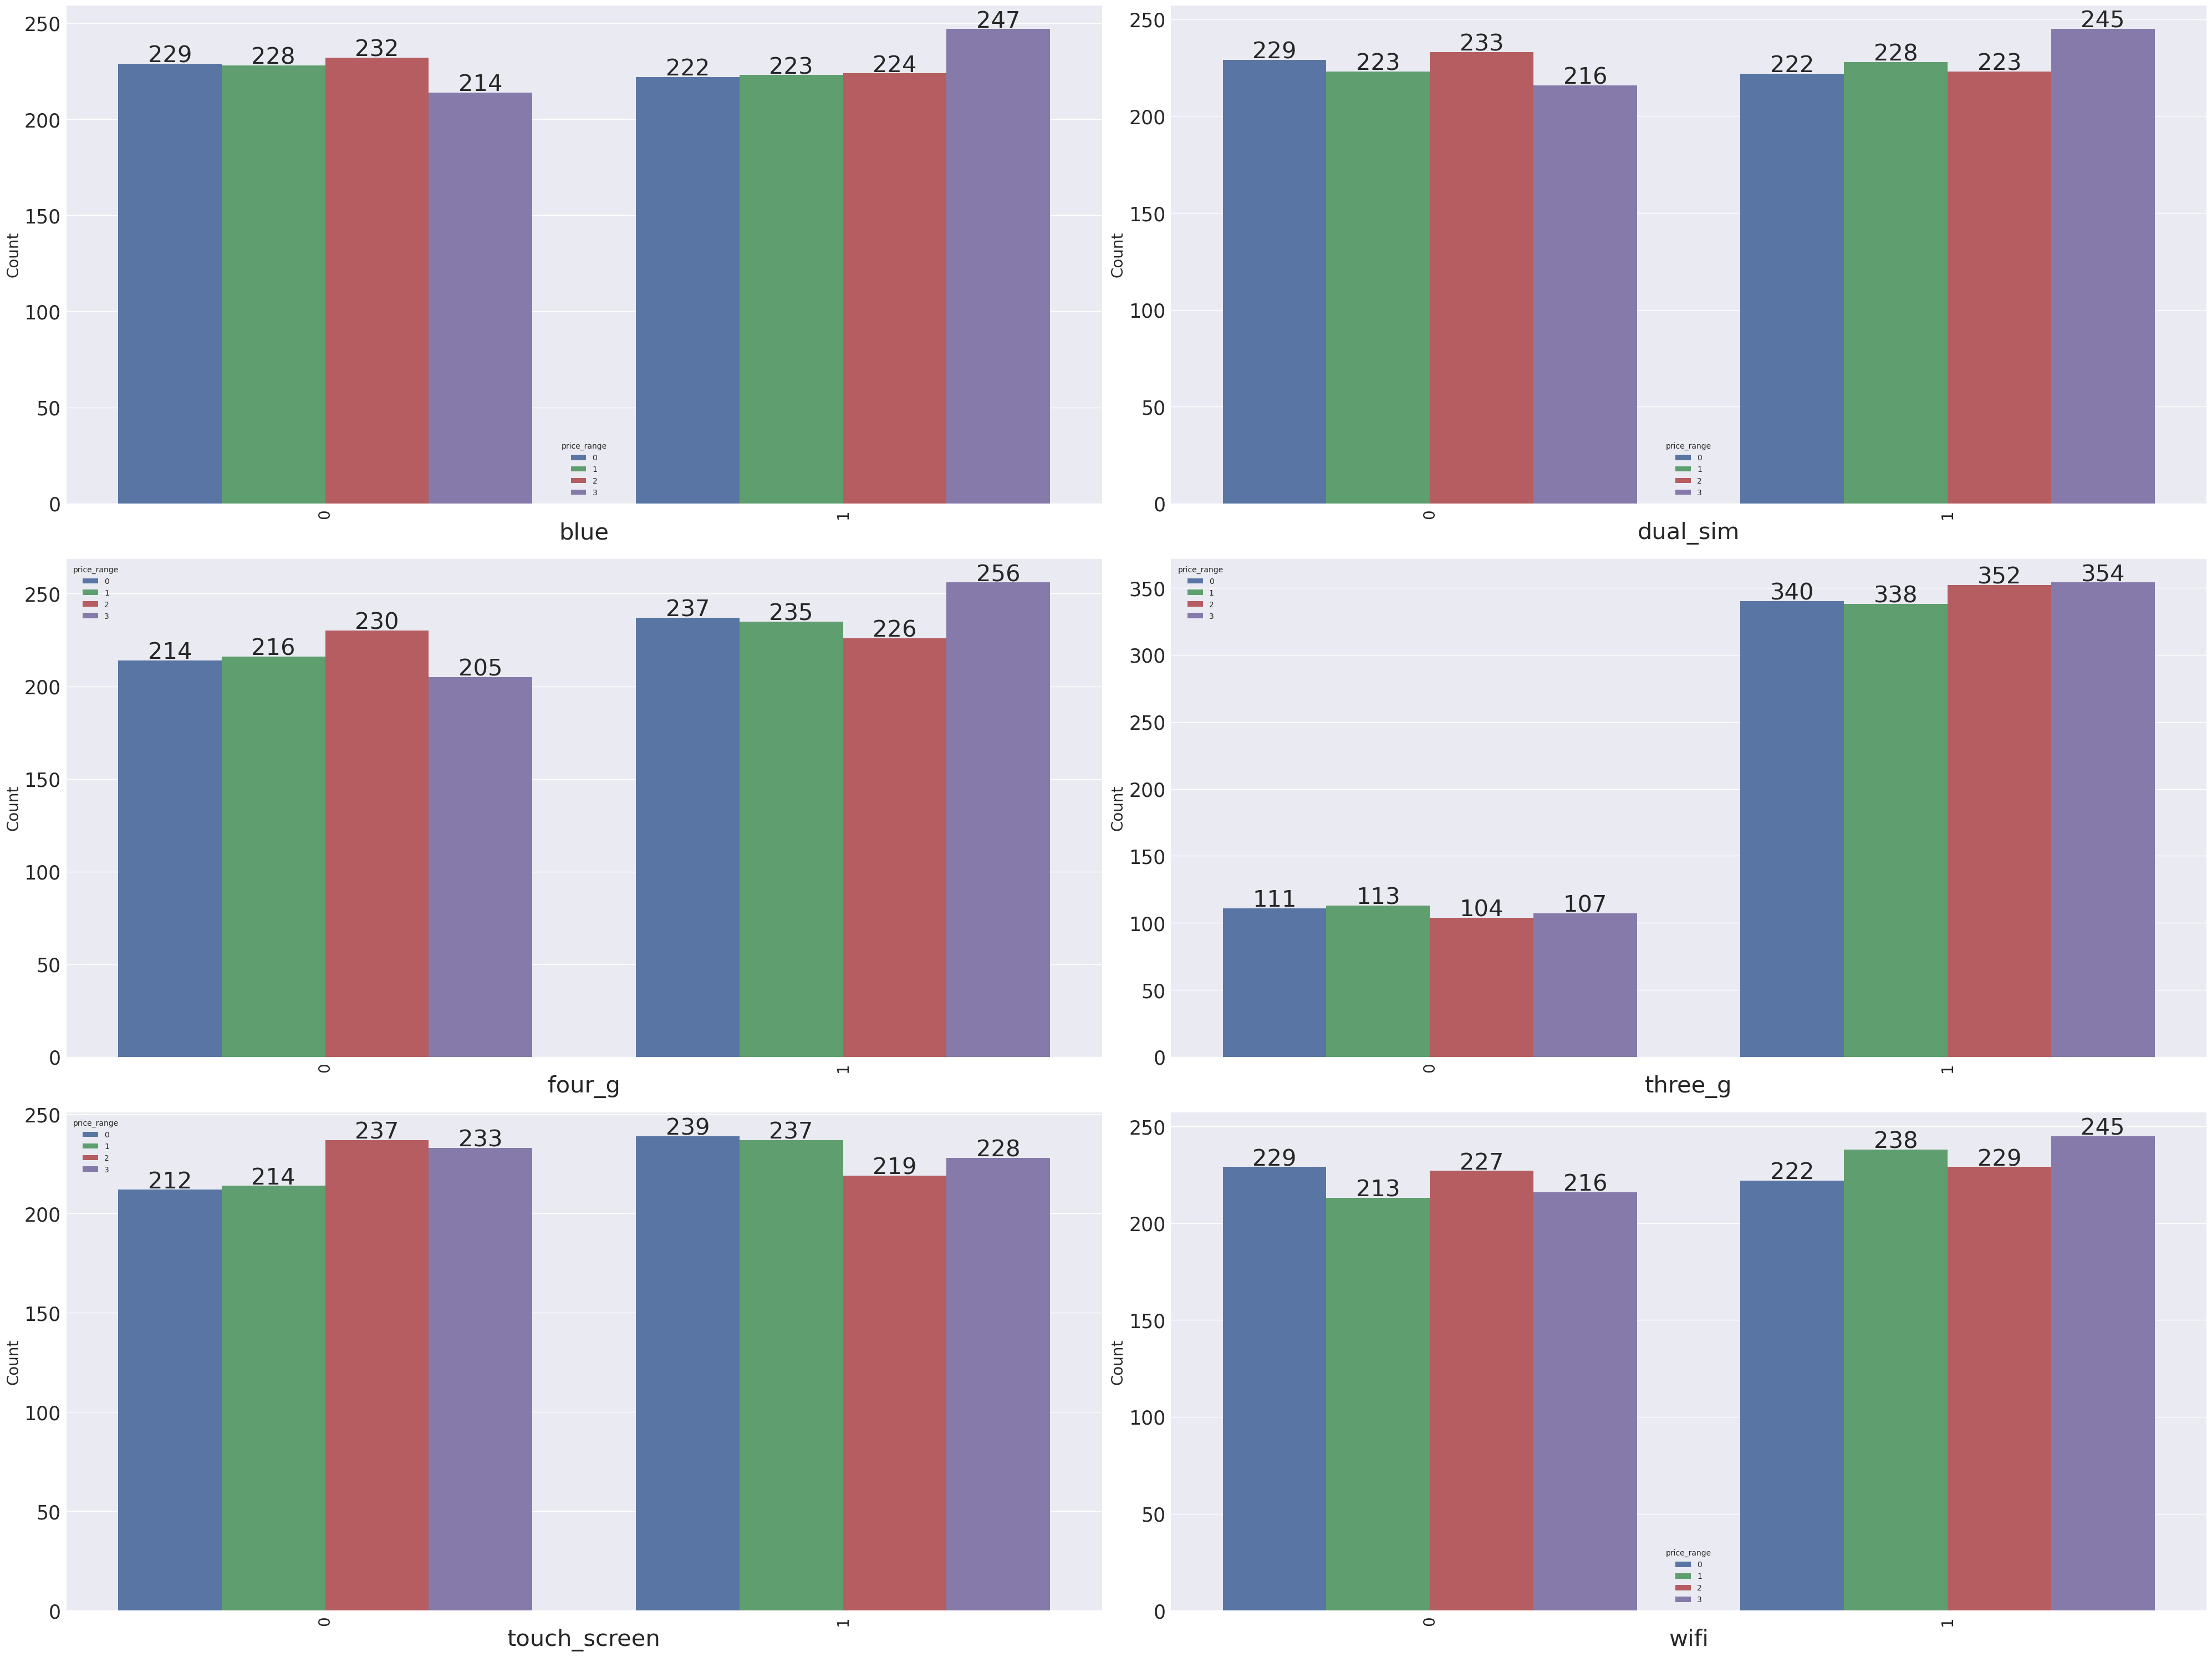

In [16]:
fig,axs = plt.subplots(nrows = 3,ncols = 2,figsize = (40,30))
axs = axs.flatten()
for i,var in enumerate(categoricals) :
    sns.countplot(x = var ,hue = 'price_range', data = df,ax = axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation = 90,fontsize = 20)   
    axs[i].set_xlabel(var ,fontsize=30) 
    axs[i].set_ylabel('Count',fontsize = 20)
    axs[i].tick_params(axis='y', labelsize=25)
    
    for p in axs[i].patches:
                axs[i].annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',
                fontsize=30)
    



fig.tight_layout()     
plt.show()

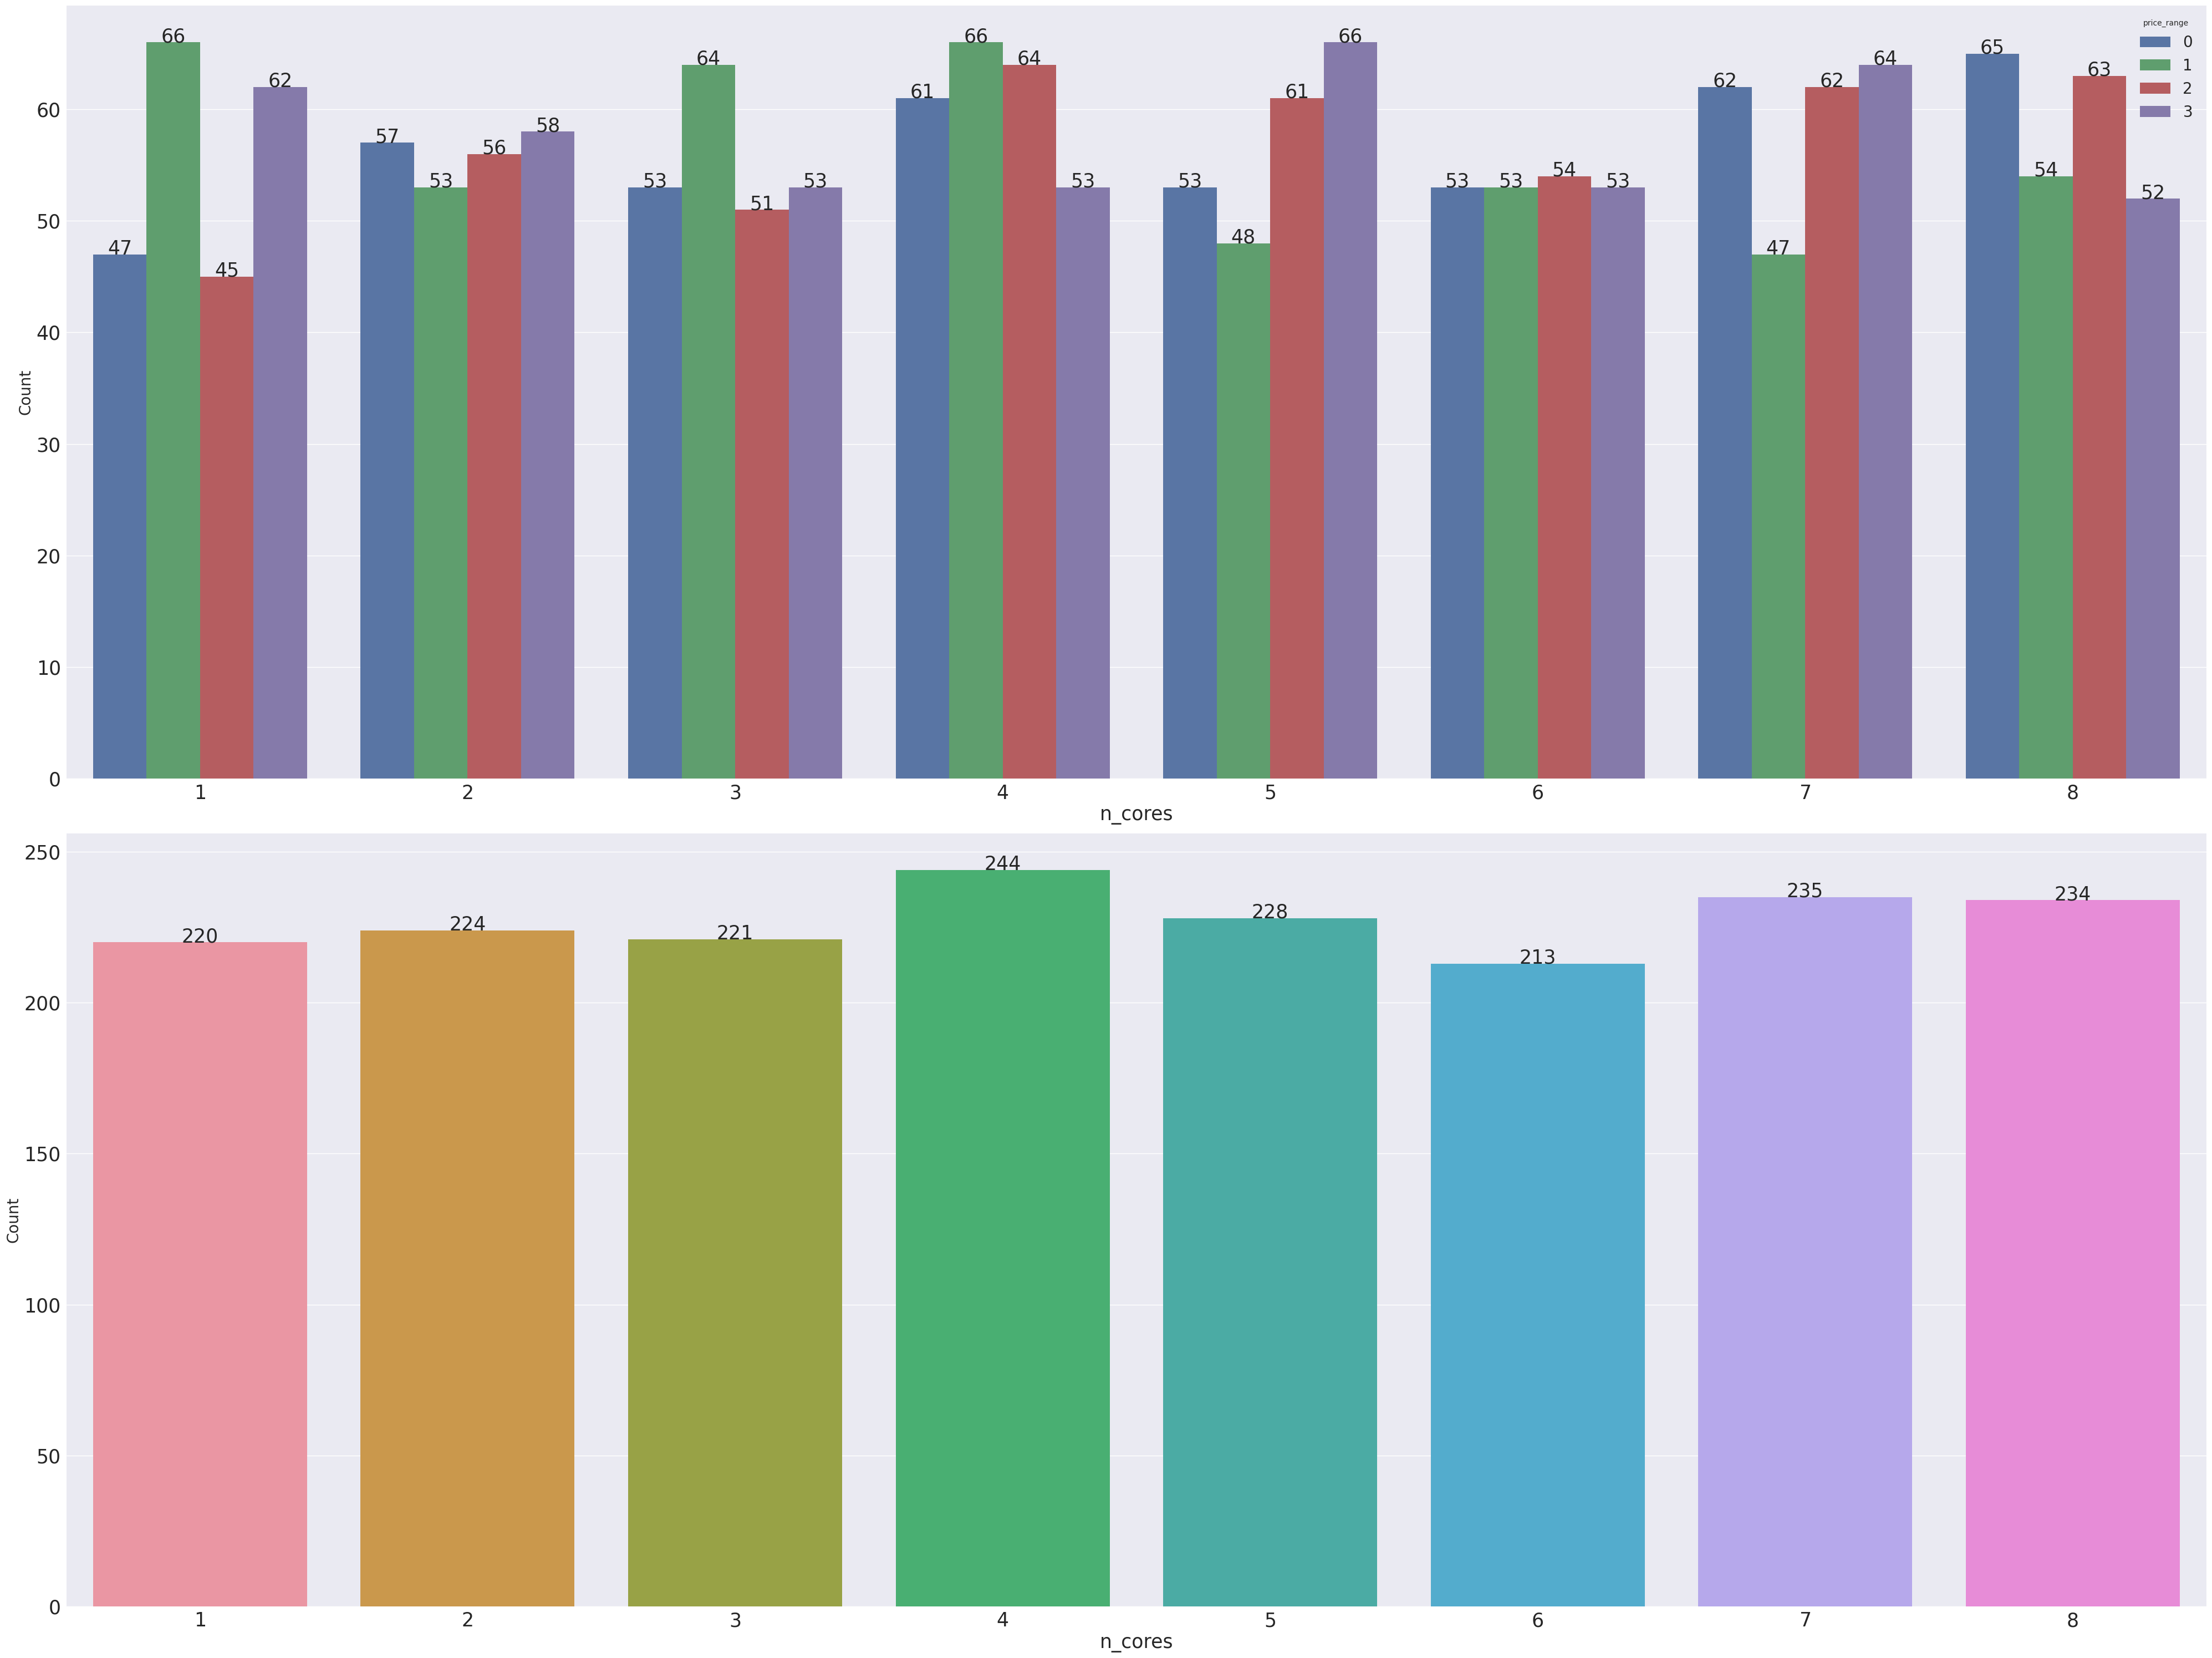

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(40, 30))
axs = axs.flatten()

variables = ['n_cores']
hues = ['price_range', None]

for i, var in enumerate(variables):
    for j, hue in enumerate(hues):
        index = i * len(hues) + j

        
        ax = sns.countplot(x=var, hue=hue, data=df, ax=axs[index])

        
        for patch in ax.patches:
            x = patch.get_x() + patch.get_width() / 2
            y = patch.get_height()
            ax.text(x, y, int(y), ha='center', fontsize=25)

        axs[index].set_xlabel(var, fontsize=25)
        axs[index].set_ylabel('Count', fontsize=20)
        axs[index].tick_params(axis='x', labelsize=25)
        axs[index].tick_params(axis='y', labelsize=25)

        if hue is not None:
            axs[index].legend(title=hue, fontsize=20)

fig.tight_layout()
plt.show()

3    461
2    456
1    451
0    451
Name: price_range, dtype: int64

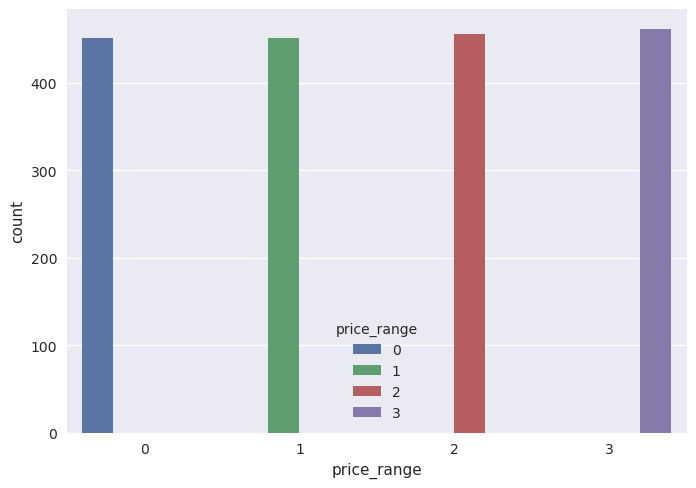

In [18]:
ax = sns.countplot(x='price_range',hue='price_range',data = df)
df['price_range'].value_counts()

**Our Target is perfectly and weirdly balanced!!!**

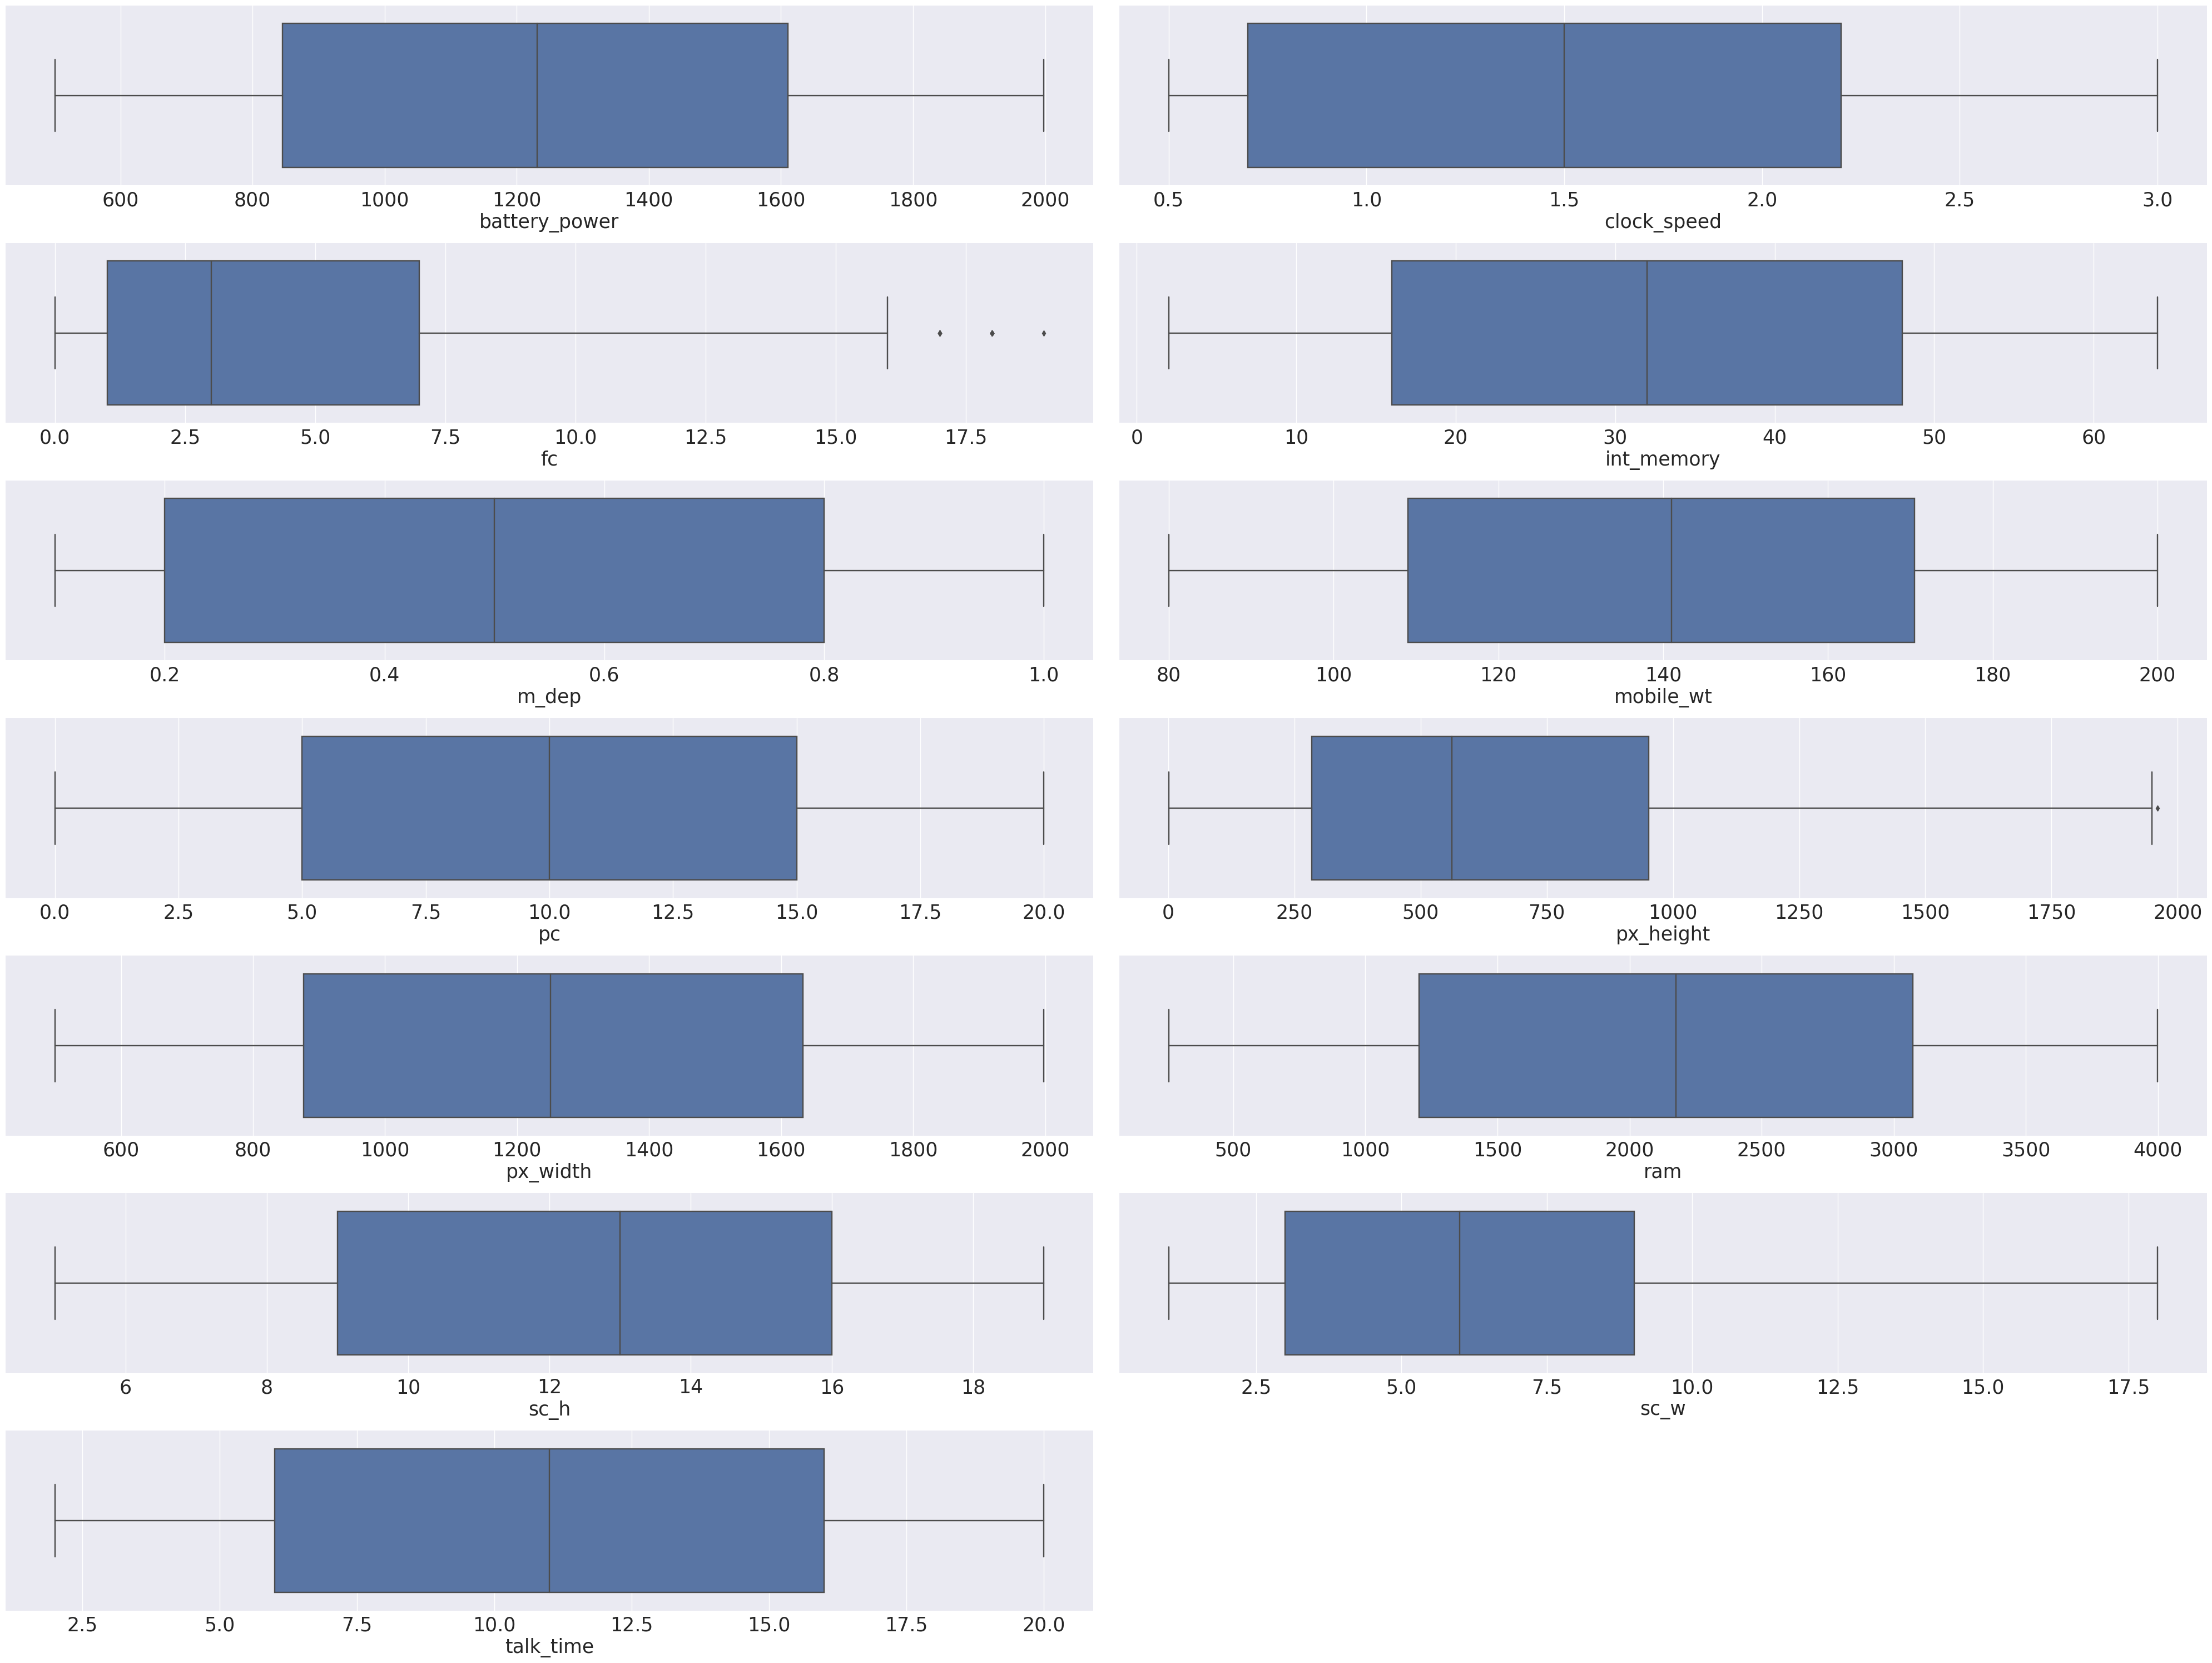

In [19]:

fig,axs = plt.subplots(nrows = 7,ncols = 2,figsize = (40,30))
axs = axs.flatten()
for i,var in enumerate(numericals) :
    sns.boxplot(x = var , data = df,ax = axs[i])
    axs[i].set_xlabel(var ,fontsize=25) 
    axs[i].tick_params(axis='x', labelsize=25)
    
        
     

    
fig.tight_layout() 
axs[-1].set_visible(False)  
plt.show()

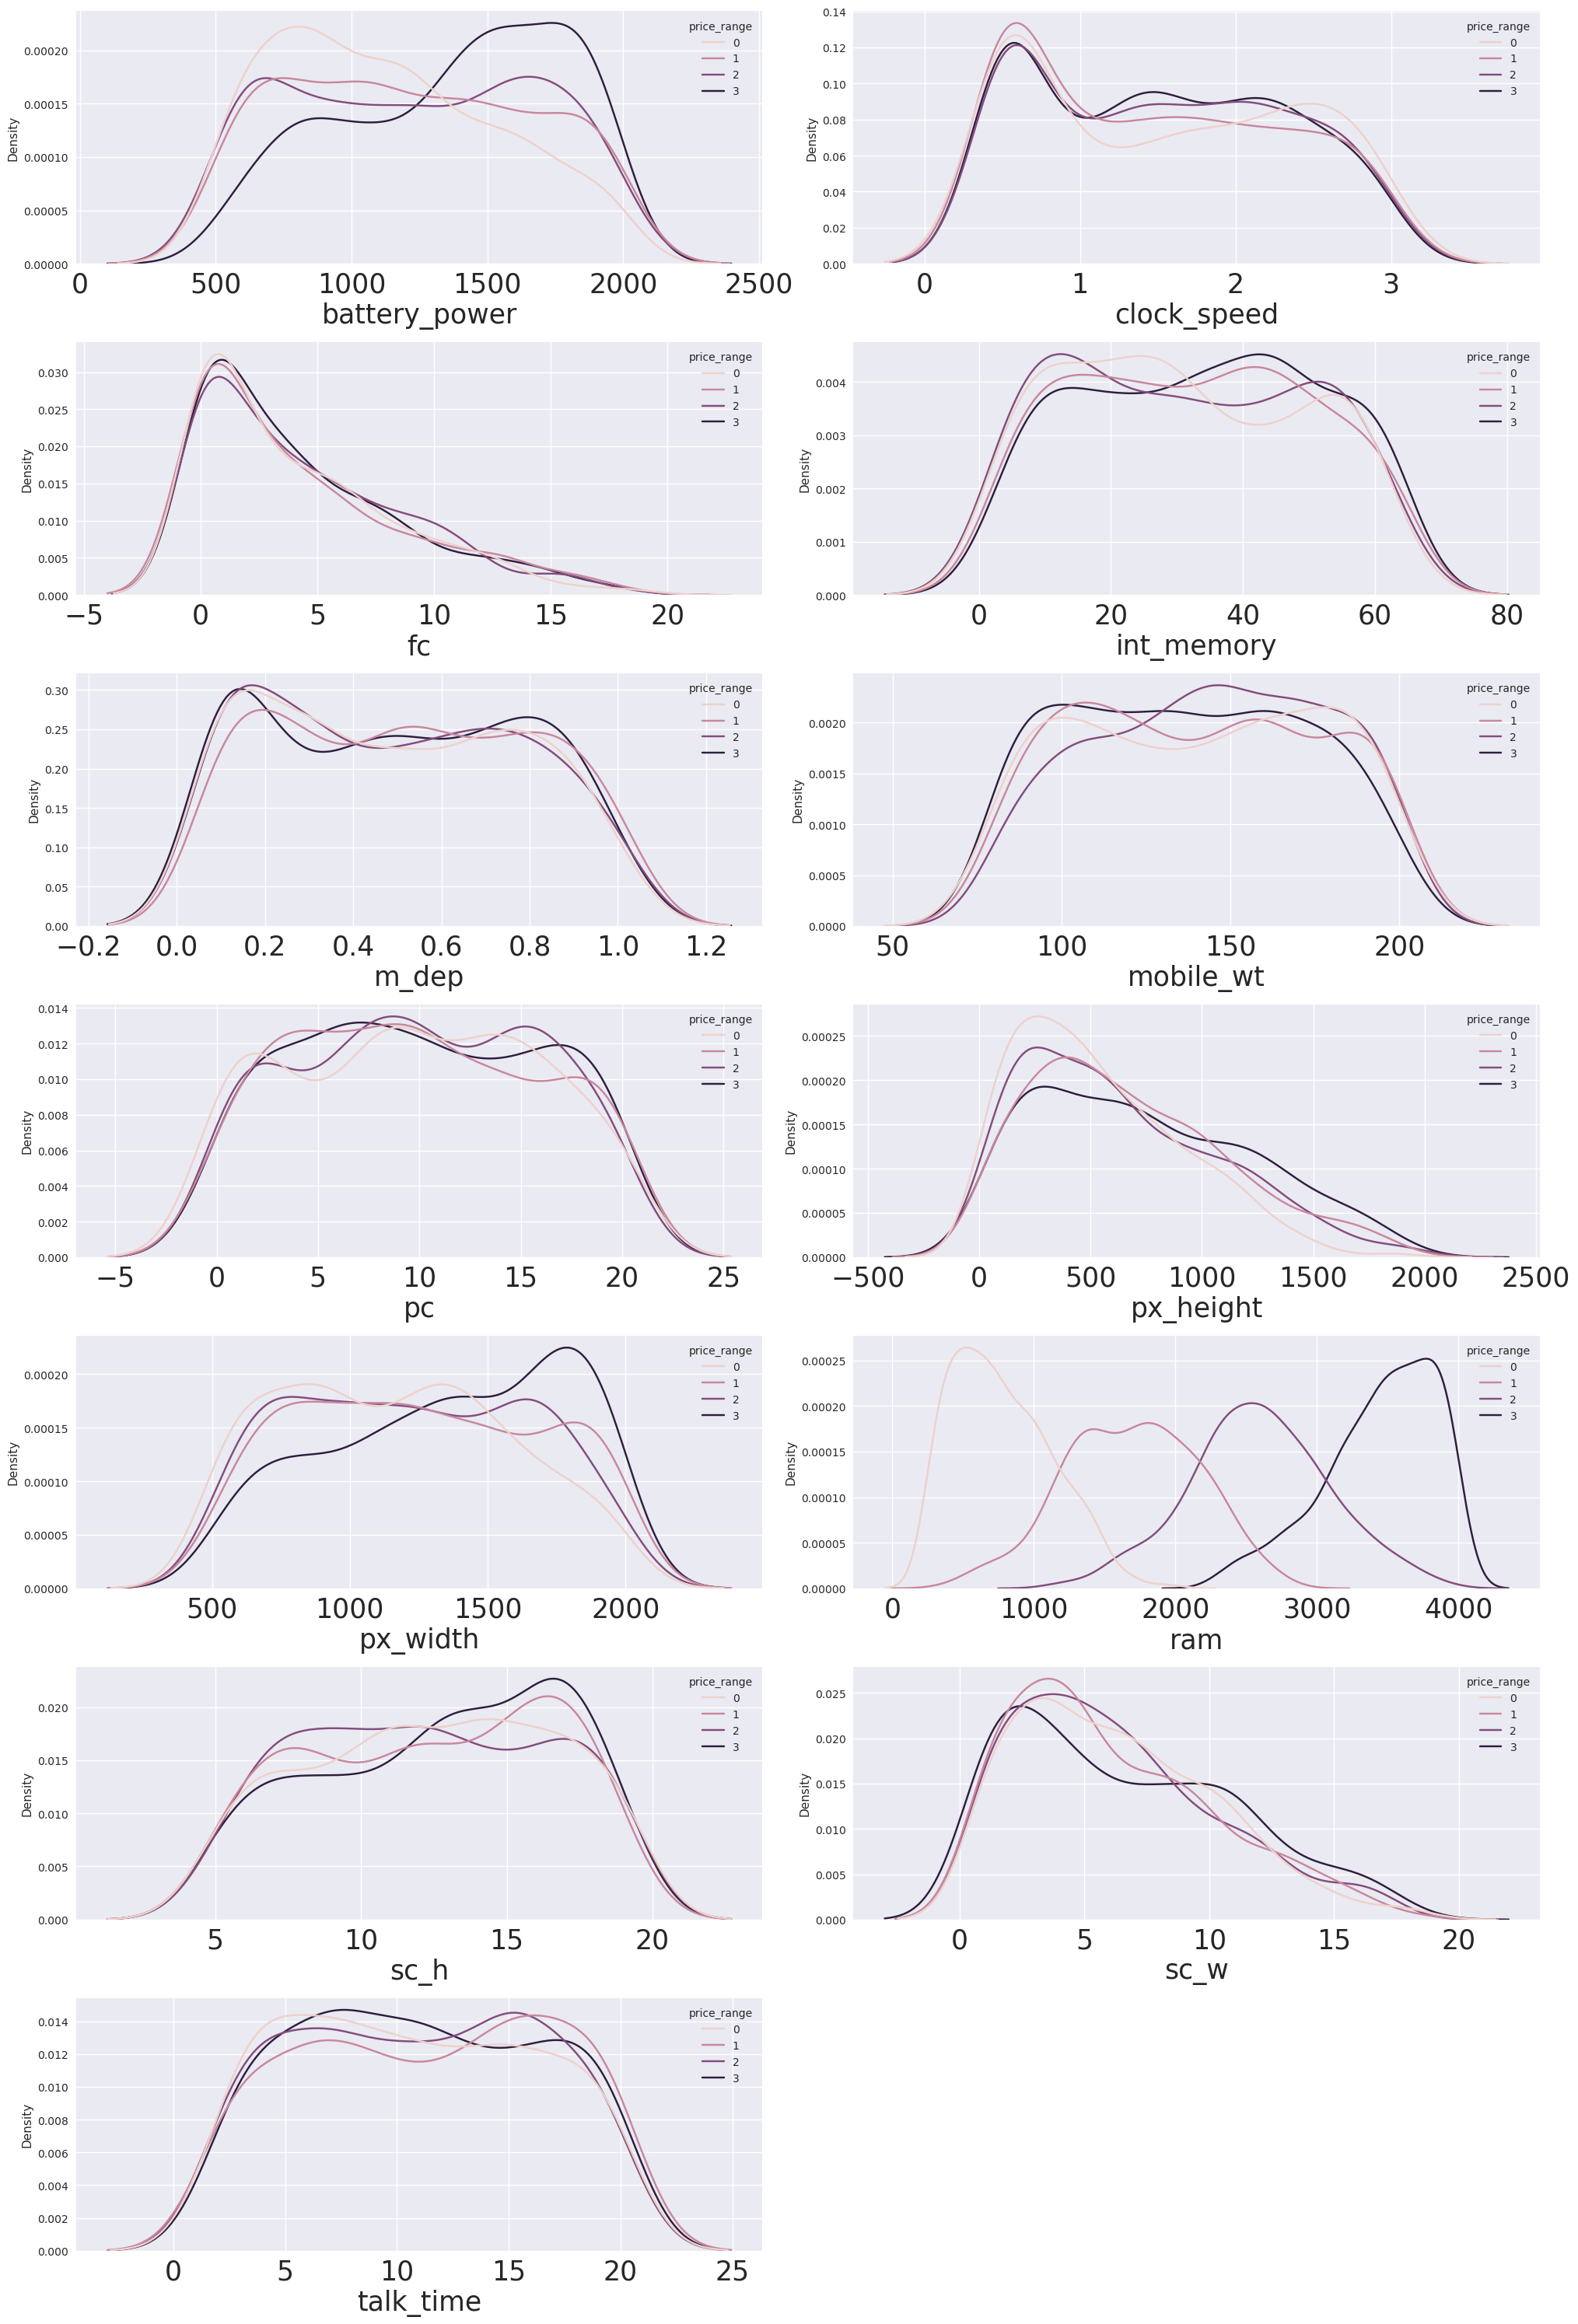

In [20]:
fig,axs = plt.subplots(nrows=7,ncols=2,figsize=(20,30))
axs =axs.flatten()
for i,var in enumerate(numericals):
    sns.kdeplot(x=var,hue = 'price_range',data = df,ax=axs[i])
    axs[i].set_xlabel(var ,fontsize=25) 
    axs[i].tick_params(axis='x', labelsize=25)

                      

                      
    
axs[-1].set_visible(False)    
fig.tight_layout() 
plt.show()

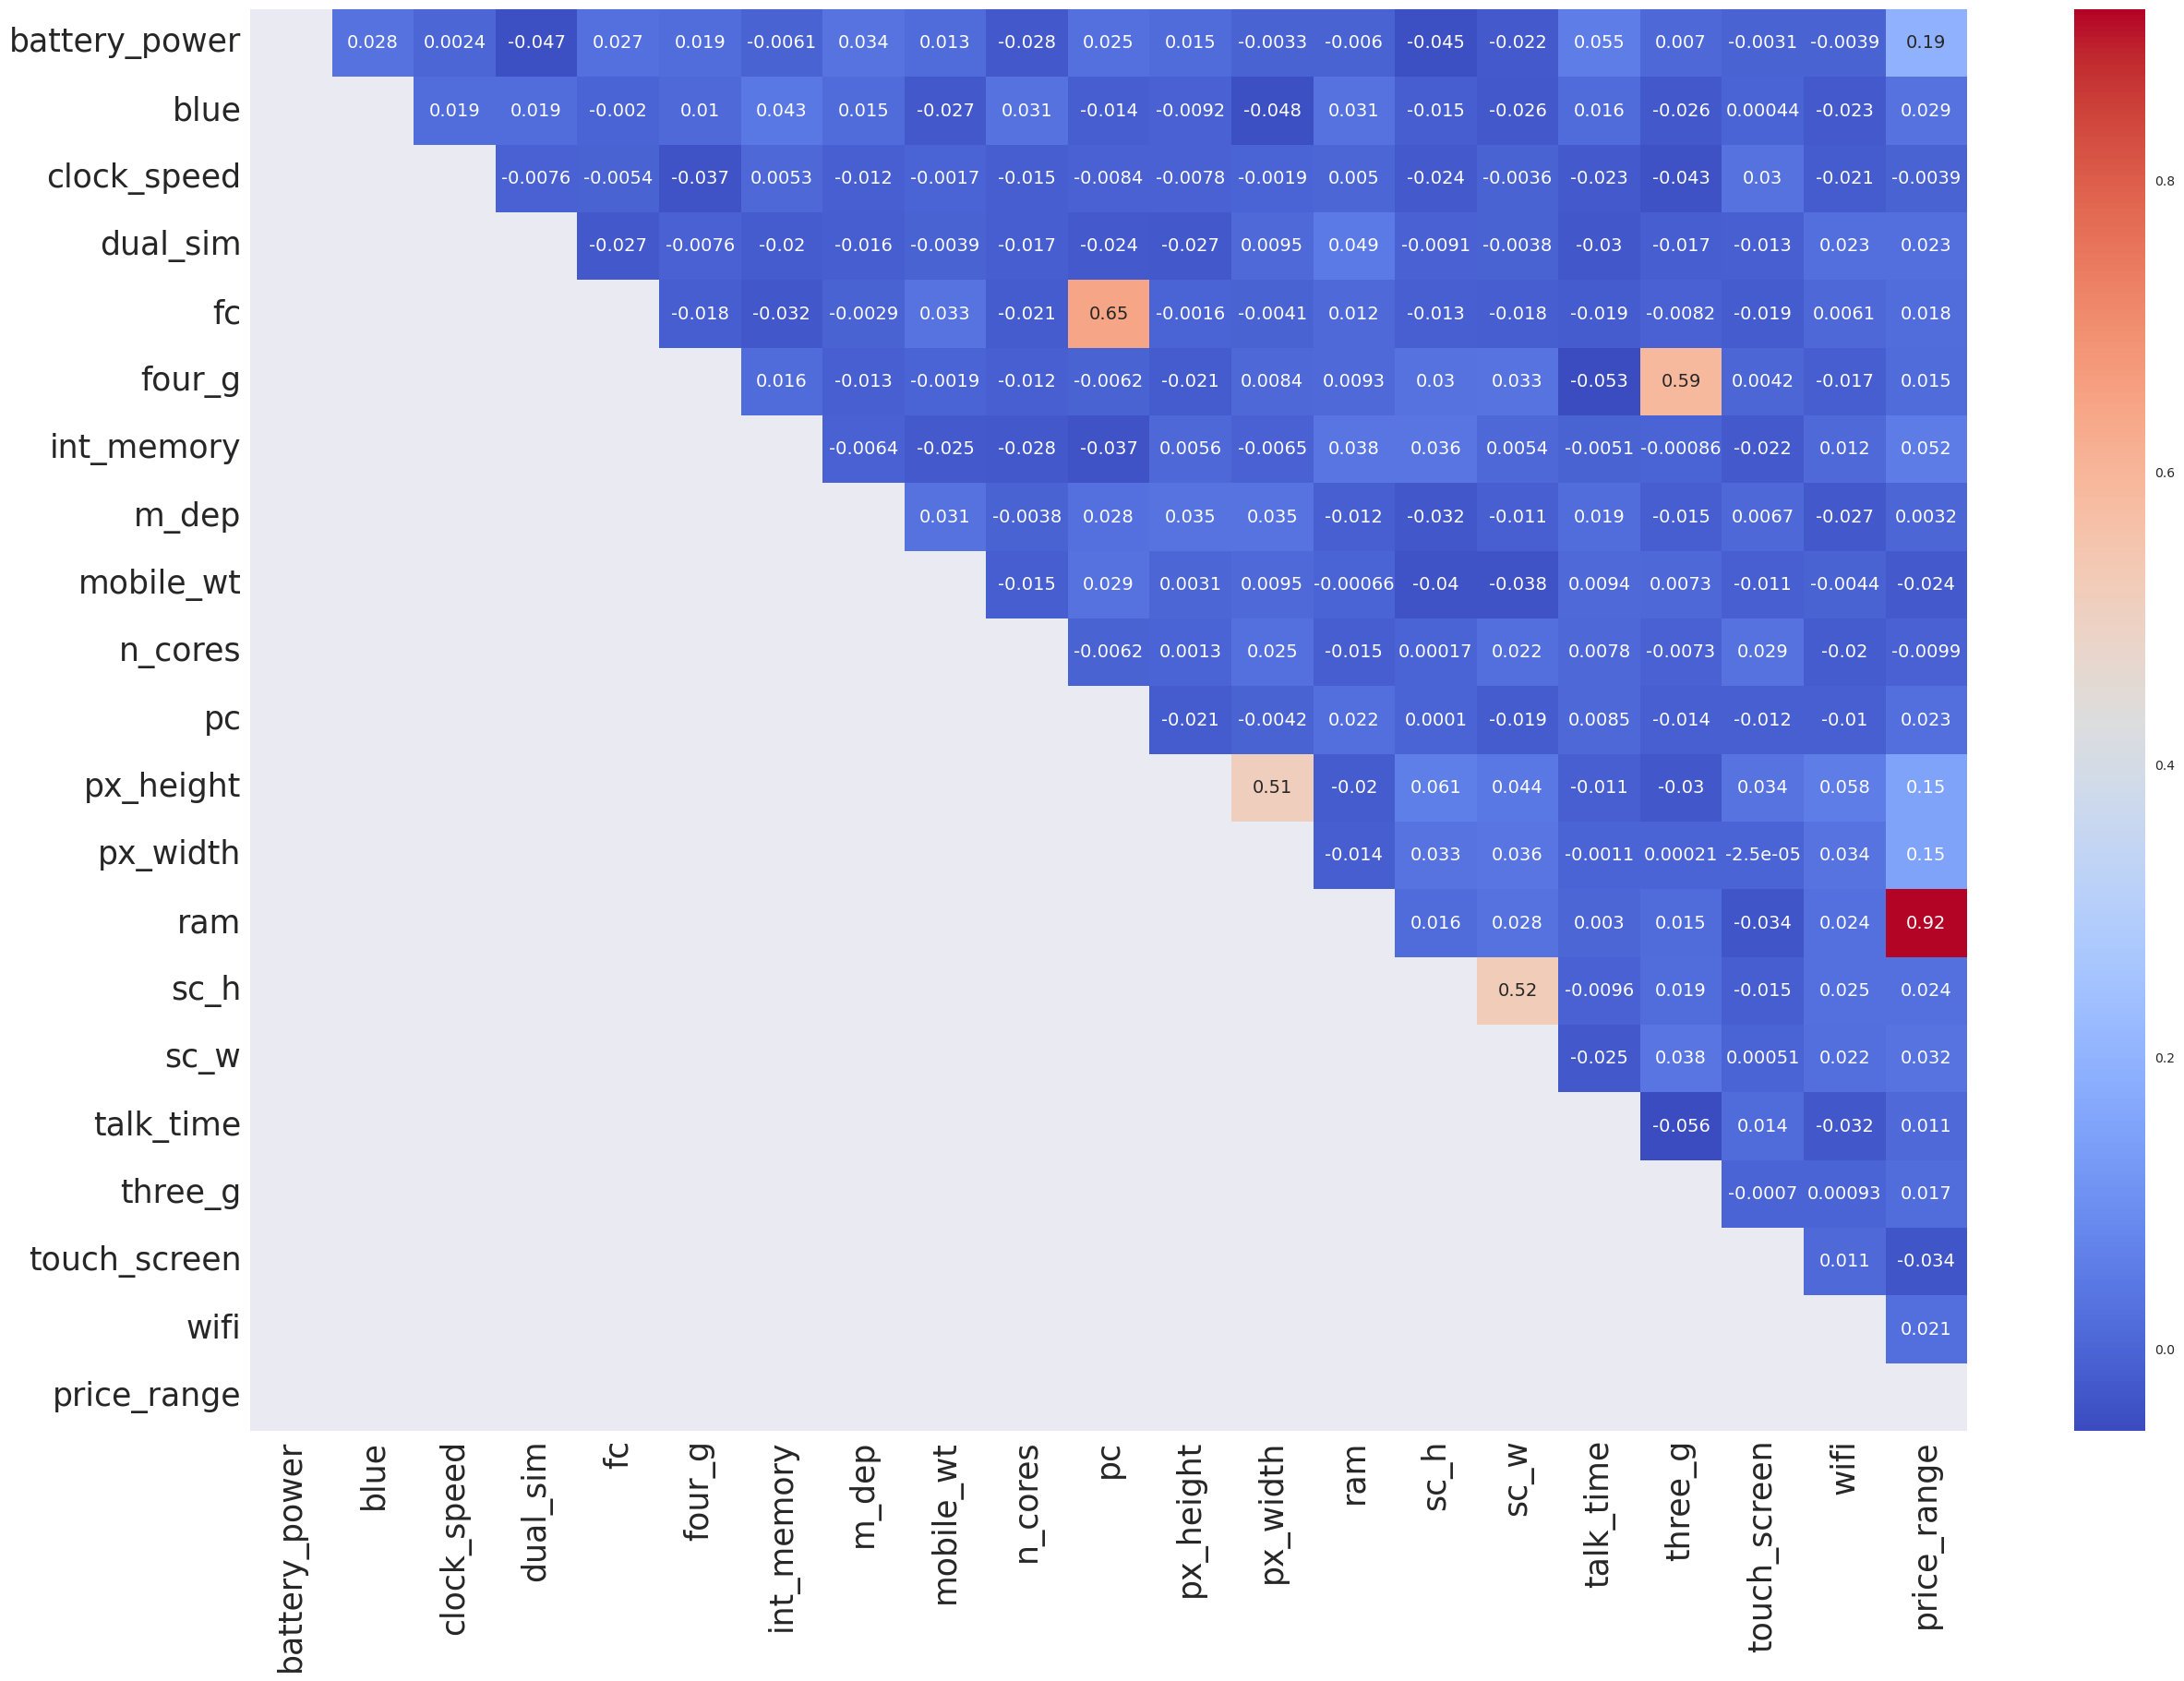

In [21]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,cbar=True,mask=np.tril(np.ones_like(df.corr())) , annot_kws={'size' : 14})
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25,rotation=0)

plt.show()

# Making The Models :

In [22]:
x = df.drop(columns= 'price_range').values
y = df['price_range'].values.reshape(-1,1)


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from yellowbrick.classifier import ConfusionMatrix

In [24]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [25]:
dt_entropy = DecisionTreeClassifier(criterion = 'entropy')
dt_gini = DecisionTreeClassifier(criterion = 'gini')
rf_entropy = RandomForestClassifier(criterion = 'entropy')
rf_gini = RandomForestClassifier(criterion = 'gini')
svm = SVC()
models = [dt_entropy,dt_gini, rf_entropy,rf_gini , svm]

In [26]:
for model in models:
    model.fit(x_train,y_train.ravel())
    print(f'Training Score for {model} : {model.score(x_train,y_train)}')
    print(f'Testing Score for {model} : {model.score(x_test,y_test)} \n')
    

Training Score for DecisionTreeClassifier(criterion='entropy') : 1.0
Testing Score for DecisionTreeClassifier(criterion='entropy') : 0.8791208791208791 

Training Score for DecisionTreeClassifier() : 1.0
Testing Score for DecisionTreeClassifier() : 0.8571428571428571 

Training Score for RandomForestClassifier(criterion='entropy') : 1.0
Testing Score for RandomForestClassifier(criterion='entropy') : 0.8763736263736264 

Training Score for RandomForestClassifier() : 1.0
Testing Score for RandomForestClassifier() : 0.8708791208791209 

Training Score for SVC() : 0.9841924398625429
Testing Score for SVC() : 0.8763736263736264 



> as we can see, svm was the best here, and DT and RF are overfitting in training so let us continue with svm

In [27]:
SVM = SVC()
C = [0.1,1,10,100]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

params = {'C':C,'kernel':kernel}

In [28]:
grid_search = GridSearchCV(estimator=SVM, param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(x_train,y_train.ravel())
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 100, 'kernel': 'linear'}
Best Accuracy: 0.965635738831615


In [29]:
SVM = SVC(C= 10 , kernel = 'linear')
SVM.fit(x_train,y_train.ravel())
print(f'Training Score for {SVM} : {SVM.score(x_train,y_train)}')
print(f'Testing Score for {SVM} : {SVM.score(x_test,y_test)} \n')

Training Score for SVC(C=10, kernel='linear') : 0.9828178694158075
Testing Score for SVC(C=10, kernel='linear') : 0.9697802197802198 



In [30]:
y_pred = SVM.predict(x_test)
print('Accuracy score :' , accuracy_score(y_test, y_pred))
print('F1 score :' , f1_score(y_test, y_pred , average = 'macro'))
print('\n Classification Report \n' , classification_report(y_test, y_pred))

Accuracy score : 0.9697802197802198
F1 score : 0.9684717757539261

 Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        90
           1       0.96      0.91      0.94        81
           2       0.97      0.98      0.98       102
           3       0.99      1.00      0.99        91

    accuracy                           0.97       364
   macro avg       0.97      0.97      0.97       364
weighted avg       0.97      0.97      0.97       364



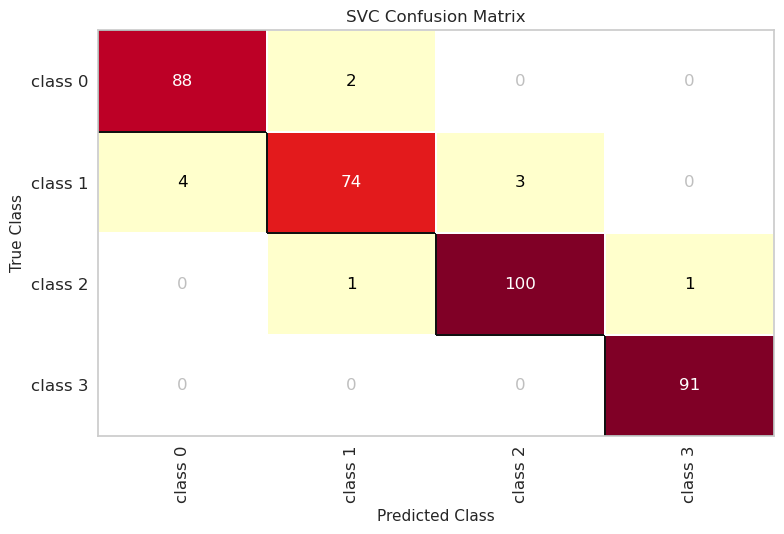

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [31]:
cm = ConfusionMatrix(SVM ,classes= ['class 0' ,'class 1' ,'class 2' ,'class 3' ] )
cm.fit(x_train , y_train)
cm.score(x_test,y_test)
cm.show()

> the model is all right ,now let's use the test data

In [32]:
x_test = df_test.values

x_train = scaler.fit_transform(x)
x_test = scaler.transform(x_test)

In [33]:
SVM.fit(x_train , y.ravel())
SVM.score(x_train , y)

0.9846069268829027

In [34]:
df_test['price_range'] = SVM.predict(x_test)
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2


In [35]:
merged_df = pd.concat([df, df_test], axis=0, ignore_index=True)
merged_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
2815,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
2816,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
2817,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2
